# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Get today's date
d = datetime.datetime.today()
date = d.strftime('%m-%d-%Y')
print(f"Today is {date}")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Today is 01-20-2020


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        # break at 600 so hopefully we have 500 that hit on the weather api
        if len(cities) == 600:
            break

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# initialize empty dataframe
cityWeatherDF = pd.DataFrame()

# loop through the cities list to get the information and append to main dataframe
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        respDF = pd.DataFrame({"City":[city],
                           "Cloudiness":response['clouds']['all'],
                           'Date':response['dt'],
                           'Humidity':response['main']['humidity'],
                           'Lat':response['coord']['lat'],
                           'Lng':response['coord']['lon'],
                           'Max Temp':response['main']['temp_max'],
                           'Wind Speed':response['wind']['speed']
                          })
        
        cityWeatherDF = cityWeatherDF.append(respDF, ignore_index=True)
        print(f"Done with {city} number {cities.index(city) + 1} of {len(cities)}")
    except (KeyError):
        print(f"Can't find {city}, skipping")

Done with tiksi number 1 of 600
Done with ushuaia number 2 of 600
Done with freeport number 3 of 600
Done with riyadh number 4 of 600
Done with nikolskoye number 5 of 600
Done with banjar number 6 of 600
Can't find taolanaro, skipping
Done with port alfred number 8 of 600
Done with ampanihy number 9 of 600
Done with kiomboi number 10 of 600
Done with srednekolymsk number 11 of 600
Done with qaanaaq number 12 of 600
Done with mataura number 13 of 600
Done with ribeira grande number 14 of 600
Done with cayenne number 15 of 600
Done with fleetwood number 16 of 600
Done with kapaa number 17 of 600
Done with japura number 18 of 600
Done with yerbogachen number 19 of 600
Done with pangnirtung number 20 of 600
Done with caohai number 21 of 600
Done with ostrovnoy number 22 of 600
Done with surt number 23 of 600
Done with linjiang number 24 of 600
Can't find sentyabrskiy, skipping
Can't find tsihombe, skipping
Done with bluff number 27 of 600
Done with barrow number 28 of 600
Done with punta a

Done with porangatu number 227 of 600
Done with buala number 228 of 600
Done with trinidad number 229 of 600
Done with sao gabriel da cachoeira number 230 of 600
Done with okha number 231 of 600
Done with chitral number 232 of 600
Done with henties bay number 233 of 600
Done with okhotsk number 234 of 600
Done with tual number 235 of 600
Done with kloulklubed number 236 of 600
Done with leshukonskoye number 237 of 600
Can't find amderma, skipping
Done with yar-sale number 239 of 600
Can't find vaitupu, skipping
Can't find kuche, skipping
Done with puri number 242 of 600
Can't find ruatoria, skipping
Done with ballina number 244 of 600
Done with sayyan number 245 of 600
Done with labuan number 246 of 600
Done with trelew number 247 of 600
Done with bengkulu number 248 of 600
Done with toktogul number 249 of 600
Done with ingham number 250 of 600
Can't find el badari, skipping
Done with kaitangata number 252 of 600
Done with monrovia number 253 of 600
Done with el real de santa maria num

Done with norman wells number 451 of 600
Done with qaqortoq number 452 of 600
Done with ilhabela number 453 of 600
Done with camocim number 454 of 600
Can't find gurgan, skipping
Done with aksu number 456 of 600
Done with sambava number 457 of 600
Done with the valley number 458 of 600
Done with umba number 459 of 600
Done with pimenta bueno number 460 of 600
Done with saquarema number 461 of 600
Done with zhangye number 462 of 600
Done with nizhniy odes number 463 of 600
Done with talnakh number 464 of 600
Done with odweyne number 465 of 600
Done with zlotow number 466 of 600
Done with kanker number 467 of 600
Done with victoria point number 468 of 600
Done with teuchitlan number 469 of 600
Done with nata number 470 of 600
Done with dwarka number 471 of 600
Done with tagbac number 472 of 600
Done with hovd number 473 of 600
Done with narsaq number 474 of 600
Done with sabha number 475 of 600
Done with sechura number 476 of 600
Done with scottsbluff number 477 of 600
Done with ormara n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cityWeatherDF.to_csv("Data/CityWeatherData.csv")
cityWeatherDF.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tiksi,2,1579569542,89,71.69,128.87,-27.22,4.47
1,ushuaia,75,1579569542,81,-54.80,-68.30,50.00,5.82
2,freeport,1,1579569542,30,40.66,-73.58,28.99,8.05
3,riyadh,0,1579569298,62,24.69,46.72,51.80,3.36
4,nikolskoye,90,1579569543,80,59.70,30.79,41.00,13.42


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

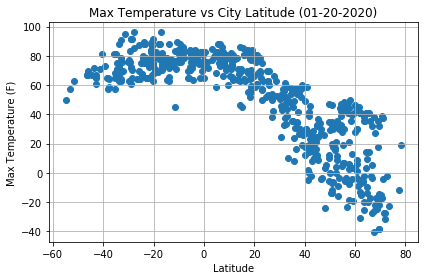

In [5]:
# set x and y values
lat = cityWeatherDF['Lat']
temp = cityWeatherDF['Max Temp']

# plot
plt.scatter(lat,temp)
# label the figure
plt.title(f"Max Temperature vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/MaxTemperatureVsCityLatitude")

#### Latitude vs. Humidity Plot

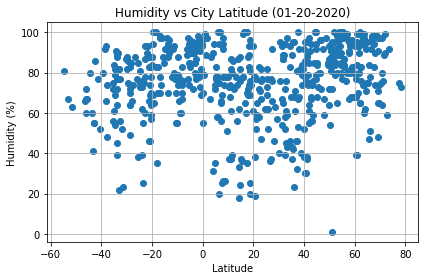

In [6]:
# set x and y values
humid = cityWeatherDF['Humidity']

# plot
plt.scatter(lat,humid)
# label the figure
plt.title(f"Humidity vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/HumidityVsCityLatitude")

#### Latitude vs. Cloudiness Plot

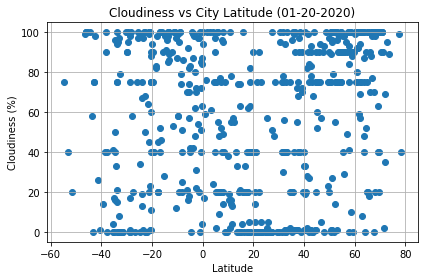

In [7]:
# set x and y values
cloud = cityWeatherDF['Cloudiness']

# plot
plt.scatter(lat,cloud)
# label the figure
plt.title(f"Cloudiness vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/CloudinessVsCityLatitude")

#### Latitude vs. Wind Speed Plot

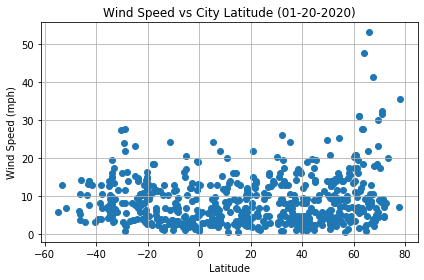

In [8]:
# set x and y values
windspd = cityWeatherDF['Wind Speed']

# plot
plt.scatter(lat,windspd)
# label the figure
plt.title(f"Wind Speed vs City Latitude ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.tight_layout()
# save the figure
plt.savefig("Figures/WindSpeedVsCityLatitude")

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregressplot(xvalues,yvalues,title,xlabel,ylabel):  
    
    # calculate linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
    regress_values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plot scatter and linear regression
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,regress_values,"r-")
    
    # annotate and label the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(min(xvalues) + 1,min(yvalues)+6),fontsize=12,color="red")
    plt.annotate(f"The r-squared is: {round(rvalue,4)}",(min(xvalues) + 1,min(yvalues)+1),fontsize=12,color="red")
    plt.grid()
    plt.tight_layout()
    print(f"The r-squared is {rvalue}")
    

In [10]:
# Create Northern and Southern Hemisphere DataFrames
cityWeatherNHemDF = cityWeatherDF[cityWeatherDF['Lat'] > 0]
cityWeatherSHemDF = cityWeatherDF[cityWeatherDF['Lat'] < 0]
cityWeatherSHemDF.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,ushuaia,75,1579569542,81,-54.80,-68.30,50.00,5.82
5,banjar,20,1579569543,83,-8.19,114.97,84.20,3.36
6,port alfred,95,1579569543,90,-33.59,26.89,63.00,3.00
7,ampanihy,99,1579569543,75,-24.70,44.75,67.55,15.17
8,kiomboi,100,1579569543,94,-4.27,34.37,63.72,1.81


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.8312913202102082


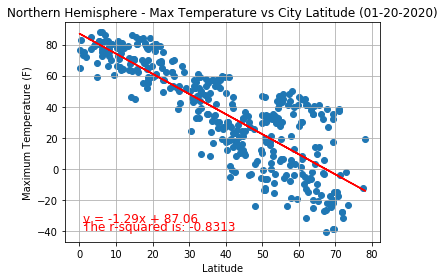

In [11]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Max Temp'],f"Northern Hemisphere - Max Temperature vs City Latitude ({date})","Latitude","Maximum Temperature (F)")
plt.savefig("Figures/NorthernHemisphereMaxTempVsCityLatitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.3551879326835454


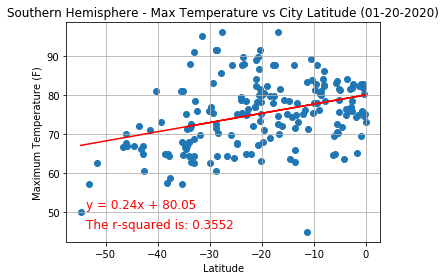

In [12]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Max Temp'],f"Southern Hemisphere - Max Temperature vs City Latitude ({date})","Latitude","Maximum Temperature (F)")
plt.savefig("Figures/SouthernHemisphereMaxTempVsCityLatitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.29567952067167297


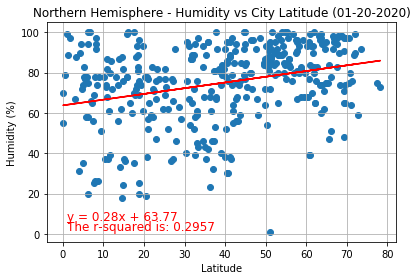

In [13]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Humidity'],f"Northern Hemisphere - Humidity vs City Latitude ({date})","Latitude","Humidity (%)")
plt.savefig("Figures/NorthernHemisphereHumidityVsCityLatitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.385885477907687


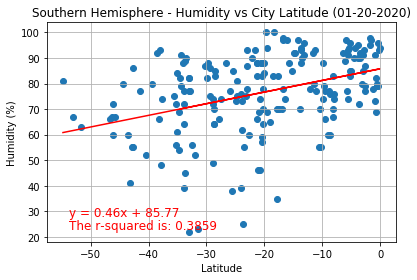

In [14]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Humidity'],f"Southern Hemisphere - Humidity vs City Latitude ({date})","Latitude","Humidity (%)")
plt.savefig("Figures/SouthernHemisphereHumidityVsCityLatitude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.3486981321573635


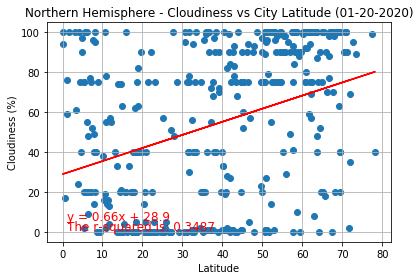

In [15]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Cloudiness'],f"Northern Hemisphere - Cloudiness vs City Latitude ({date})","Latitude","Cloudiness (%)")
plt.savefig("Figures/NorthernHemisphereCloudinessVsCityLatitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.13291120783857346


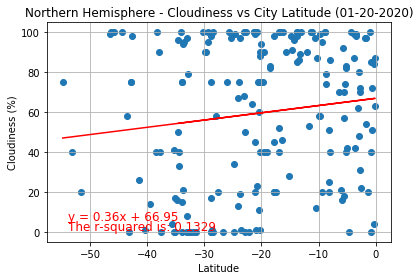

In [16]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Cloudiness'],f"Northern Hemisphere - Cloudiness vs City Latitude ({date})","Latitude","Cloudiness (%)")
plt.savefig("Figures/SouthernHemisphereCloudinessVsCityLatitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is 0.24836375518114587


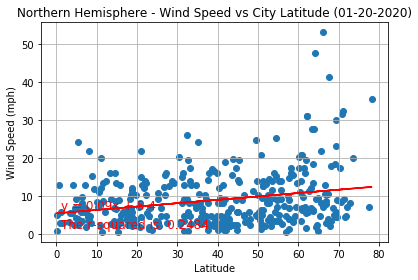

In [17]:
# set parameters and run function
linregressplot(cityWeatherNHemDF['Lat'],cityWeatherNHemDF['Wind Speed'],f"Northern Hemisphere - Wind Speed vs City Latitude ({date})","Latitude","Wind Speed (mph)")
plt.savefig("Figures/NorthernHemisphereWindSpeedVsCityLatitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.183266088560635


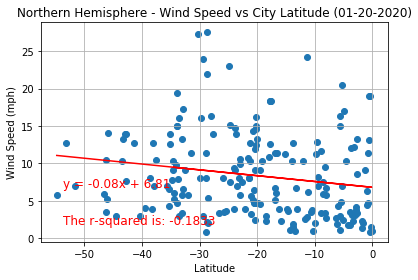

In [18]:
# set parameters and run function
linregressplot(cityWeatherSHemDF['Lat'],cityWeatherSHemDF['Wind Speed'],f"Northern Hemisphere - Wind Speed vs City Latitude ({date})","Latitude","Wind Speed (mph)")
plt.savefig("Figures/SouthernHemisphereWindSpeedVsCityLatitude.png")